## Mobile price Prediction

Data analysis in mobile price prediction involves understanding the relationships between various features (such as brand, RAM, storage, battery, etc.) 
an the target variable, which is the price. 
This process typically follows these steps

## Detail

1.Product_id: ID of each cellphone.
2.Price: Price of each cellphone.
3.Sale: Sales number.
4.weight: Weight of each cellphone.
5.resoloution: Resoloution of each cellphone.
6.ppi: Phone Pixel Density.
7.cpu core: Type of CPU core in each cellphone.
8.cpu freq: CPU Frequency in each cellphone.
9.internal mem: Internal memory of each cellphone.
10.ram: RAM of each cellphone.
11.RearCam: Rear Camera pixel.
12.Front_Cam: Front Camera pixel.
13.battery: Battery capacity.
14.thickness: Cellphone thickness

## Import liabraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [26]:
cell_df=pd.read_csv("Cellphone.csv")
cell_df.head()  ##shows the first few rows of a dataset

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [27]:
cell_df.tail() ##displays the first few rows of a dataset

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


## Data preprocessing 

In [28]:
cell_df.shape  ## dimensions of a dataset

(161, 14)

In [29]:
cell_df.columns  ## specifi attribute in a dataset

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [30]:
cell_df.sample()  ##subset of data selected from the larger dataset

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
109,637,2858,285,174.0,5.7,513,4,1.875,32.0,4.0,16.0,5.0,3200,7.6


In [31]:

cell_df.sample(10)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
130,1089,1357,523,165.0,4.66,200,4,1.200,0.0,0.000,5.00,0.0,2600,11.6
87,1216,3837,119,167.8,5.43,541,4,1.875,128.0,6.000,16.00,8.0,3600,7.6
150,826,614,2171,69.8,1.40,129,0,0.000,0.0,0.004,0.00,0.0,800,14.1
101,827,833,201,78.4,2.40,166,0,0.000,0.0,0.008,0.00,0.0,1100,12.9
8,99,1315,14,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
47,1145,3316,41,144.0,5.20,428,8,1.750,32.0,3.000,20.70,5.1,2930,6.9
12,622,2174,16,140.0,5.00,294,4,1.300,16.0,1.000,13.00,5.0,2000,8.2
128,1112,2491,456,753.0,12.20,247,8,1.600,32.0,3.000,8.00,2.0,9500,8.0
38,575,1777,36,174.0,5.50,178,4,1.300,4.0,0.512,5.00,0.0,2250,9.2
104,133,2744,208,142.0,5.00,440,8,1.250,16.0,2.000,16.00,8.0,2700,8.0


In [32]:
cell_df.info()  ##summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [33]:
cell_df.isnull().sum()  ## detect missing values in a DataFrame

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [34]:
cell_df.describe()  ## statistical metrics for the numerical columns in a DataFrame

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


cell_df.describe(include='object') ## no objects in data set

In [35]:
cell_df.duplicated().sum()  ## No duplicates

np.int64(0)

In [36]:
cell_df.describe()[1:].T.style.background_gradient(cmap='GnBu', axis=1)

,mean,std,min,25%,50%,75%,max
Product_id,675.559006,410.851583,10.000000,237.000000,774.000000,1026.000000,1339.000000
Price,2215.596273,768.187171,614.000000,1734.000000,2258.000000,2744.000000,4361.000000
Sale,621.465839,1546.618517,10.000000,37.000000,106.000000,382.000000,9807.000000
weight,170.426087,92.888612,66.000000,134.100000,153.000000,170.000000,753.000000
resoloution,5.209938,1.509953,1.400000,4.800000,5.150000,5.500000,12.200000
ppi,335.055901,134.826659,121.000000,233.000000,294.000000,428.000000,806.000000
cpu core,4.857143,2.444016,0.000000,4.000000,4.000000,8.000000,8.000000
cpu freq,1.502832,0.599783,0.000000,1.200000,1.400000,1.875000,2.700000
internal mem,24.501714,28.804773,0.000000,8.000000,16.000000,32.000000,128.000000
ram,2.204994,1.609831,0.000000,1.000000,2.000000,3.000000,6.000000


statistical information on the table above.

finding unique data

In [37]:
cell_df.apply(lambda x: len(x.unique()))

Product_id       83
Price            81
Sale            125
weight           62
resoloution      24
ppi              45
cpu core          6
cpu freq         28
internal mem     10
ram              12
RearCam          18
Front_Cam        15
battery          55
thickness        49
dtype: int64

In [38]:
unique = cell_df.nunique()
unique.to_frame().T

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,83,81,125,62,24,45,6,28,10,12,18,15,55,49


## Data visualisation

## Scatterplot

In [39]:
import pandas as pd

In [40]:
col_names = ['sepal_length','sepal_width','petal_length','petal_width','species']

csv_url = 'Cellphone.csv'
mobile_df = pd.read_csv(csv_url, names  = col_names)

In [41]:
mobile_df.head()                ##relation between two variables

,,,,,,,,,sepal_length,sepal_width,petal_length,petal_width,species
Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
203,2357,10,135,5.2,424,8,1.35,16,3,13,8,2610,7.4
880,1749,10,125,4,233,2,1.3,4,1,3.15,0,1700,9.9
40,1916,10,110,4.7,312,4,1.2,8,1.5,13,5,2000,7.6
99,1315,11,118.5,4,233,2,1.3,4,0.512,3.15,0,1400,11


In [42]:
mobile_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [43]:
mobile_df['species'].unique()

array(['thickness', '7.4', '9.9', '7.6', '11', '9.5', '11.7', '8.1',
       '7.7', '8.9', '8.2', '8.3', '10', '8.5', '7.9', '10.3', '8.8',
       '6.4', '6.9', '5.9', '9.8', '7.8', '9.2', '10.1', '8.7', '7.5',
       '12.3', '9.1', '9.3', '5.1', '7.3', '9', '13.2', '10.6', '8.4',
       '9.7', '10.8', '12.9', '8', '12.4', '7', '10.9', '10.2', '15.6',
       '11.6', '6.3', '9.4', '18.5', '14.1', '6.8'], dtype=object)

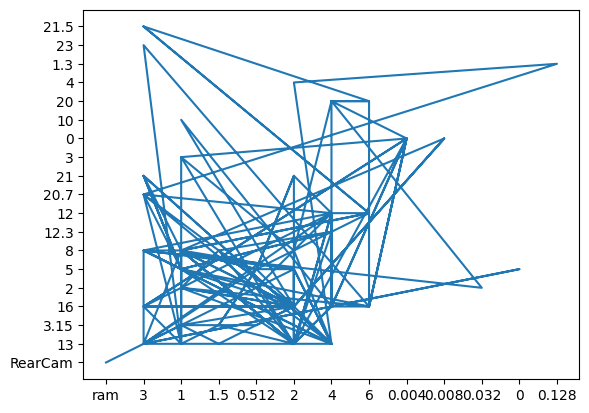

In [44]:
plt.plot(mobile_df.sepal_length,mobile_df.sepal_width)
plt.show()

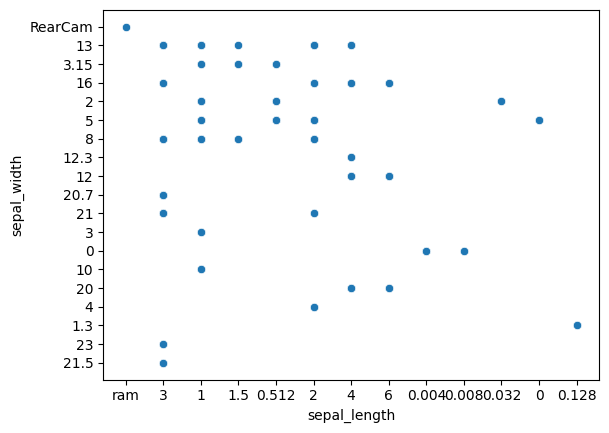

In [45]:
sns.scatterplot(x=mobile_df.sepal_length,y=mobile_df.sepal_width);
plt.show()

In [46]:
mobile_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,162,162,162,162,162
unique,13,19,16,56,50
top,1,13,5,3000,8.5
freq,36,27,42,13,10


In [47]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 162 entries, ('Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem') to ('1131', '2536', '9807', '202', '6', '367', '8', '1.5', '16')
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  162 non-null    object
 1   sepal_width   162 non-null    object
 2   petal_length  162 non-null    object
 3   petal_width   162 non-null    object
 4   species       162 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB


## Data histogram

 represents the freqency distribution of a few data points of one variable

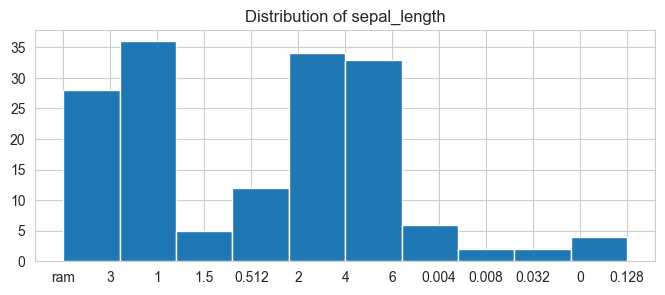

In [41]:
plt.figure(figsize=(8,3))
plt.title("Distribution of sepal_length")
plt.hist(mobile_df.sepal_length)
plt.show()                           

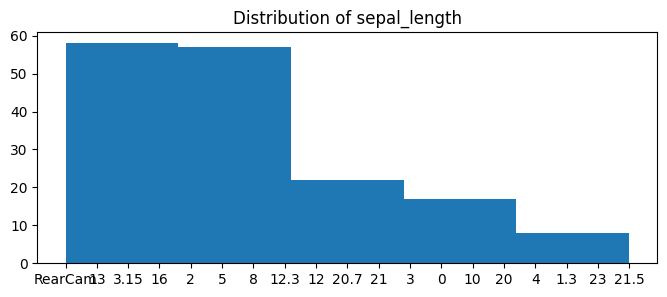

In [48]:
plt.figure(figsize=(8,3))
plt.title("Distribution of sepal_length")
plt.hist(mobile_df.sepal_width,bins=5)
plt.show()

## heat map

relationship between two variables one ploted each axis

In [49]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 162 entries, ('Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem') to ('1131', '2536', '9807', '202', '6', '367', '8', '1.5', '16')
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  162 non-null    object
 1   sepal_width   162 non-null    object
 2   petal_length  162 non-null    object
 3   petal_width   162 non-null    object
 4   species       162 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB


In [50]:
num_fea=mobile_df[['sepal_length','sepal_width','petal_length','petal_width']]
num_fea

,,,,,,,,,sepal_length,sepal_width,petal_length,petal_width
Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery
203,2357,10,135,5.2,424,8,1.35,16,3,13,8,2610
880,1749,10,125,4,233,2,1.3,4,1,3.15,0,1700
40,1916,10,110,4.7,312,4,1.2,8,1.5,13,5,2000
99,1315,11,118.5,4,233,2,1.3,4,0.512,3.15,0,1400
...,...,...,...,...,...,...,...,...,...,...,...,...
1206,3551,4638,178,5.46,538,4,1.875,128,6,12,16,4080
1296,3211,8016,170,5.5,534,4,1.975,128,6,20,8,3400
856,3260,8809,150,5.5,401,8,2.2,64,4,20,20,3000
1296,3211,8946,170,5.5,534,4,1.975,128,6,20,8,3400


In [51]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [52]:
num_corr=cell_df[[ 'ram', 'Price','Sale']]
num_corr.head()

,ram,Price,Sale
0,3.000,2357,10
1,1.000,1749,10
2,1.500,1916,10
3,0.512,1315,11
4,1.000,1749,11


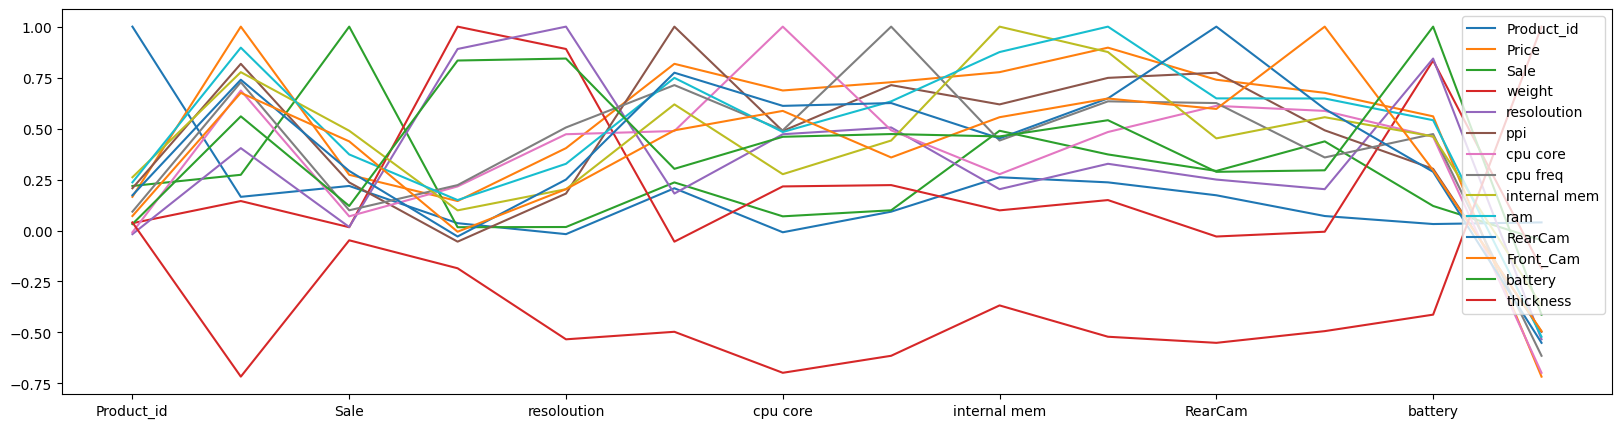

In [55]:
num_corr=cell_df.corr()
num_corr.plot(figsize=(20,5))
plt.show()

## Thresholded Correlation Map

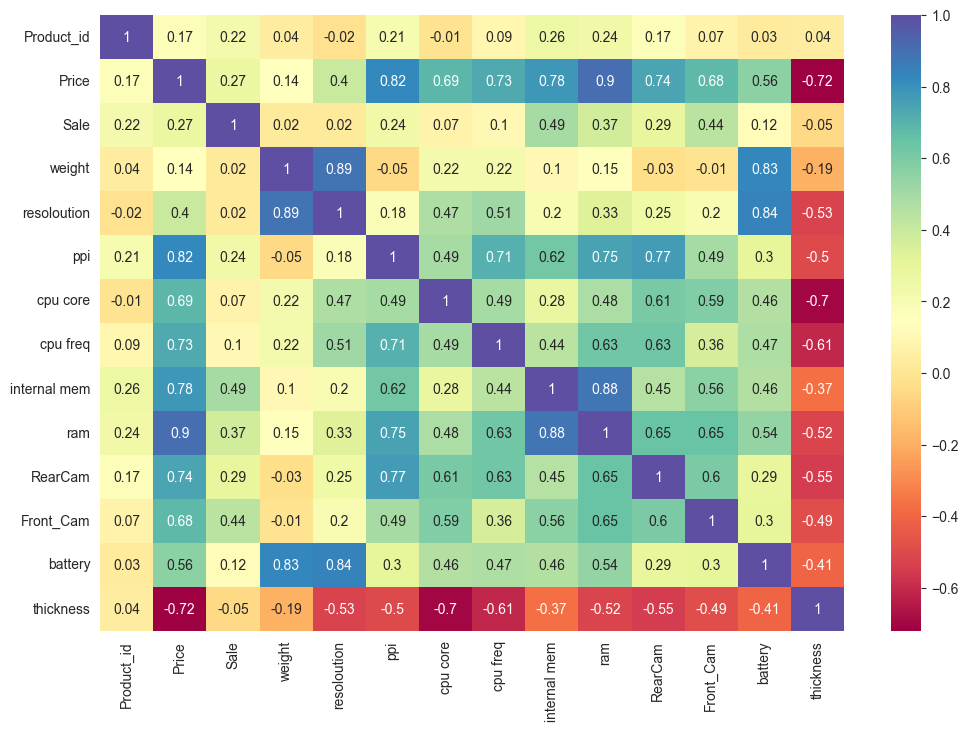

In [123]:
plt.figure(figsize=(12,8))
sns.heatmap(cell_df.corr().round(2), cmap='Spectral', annot=True)
plt.show()

statistical method that identifies the strength of a relation between two or more variables

In [51]:
cell_df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [52]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## subplot

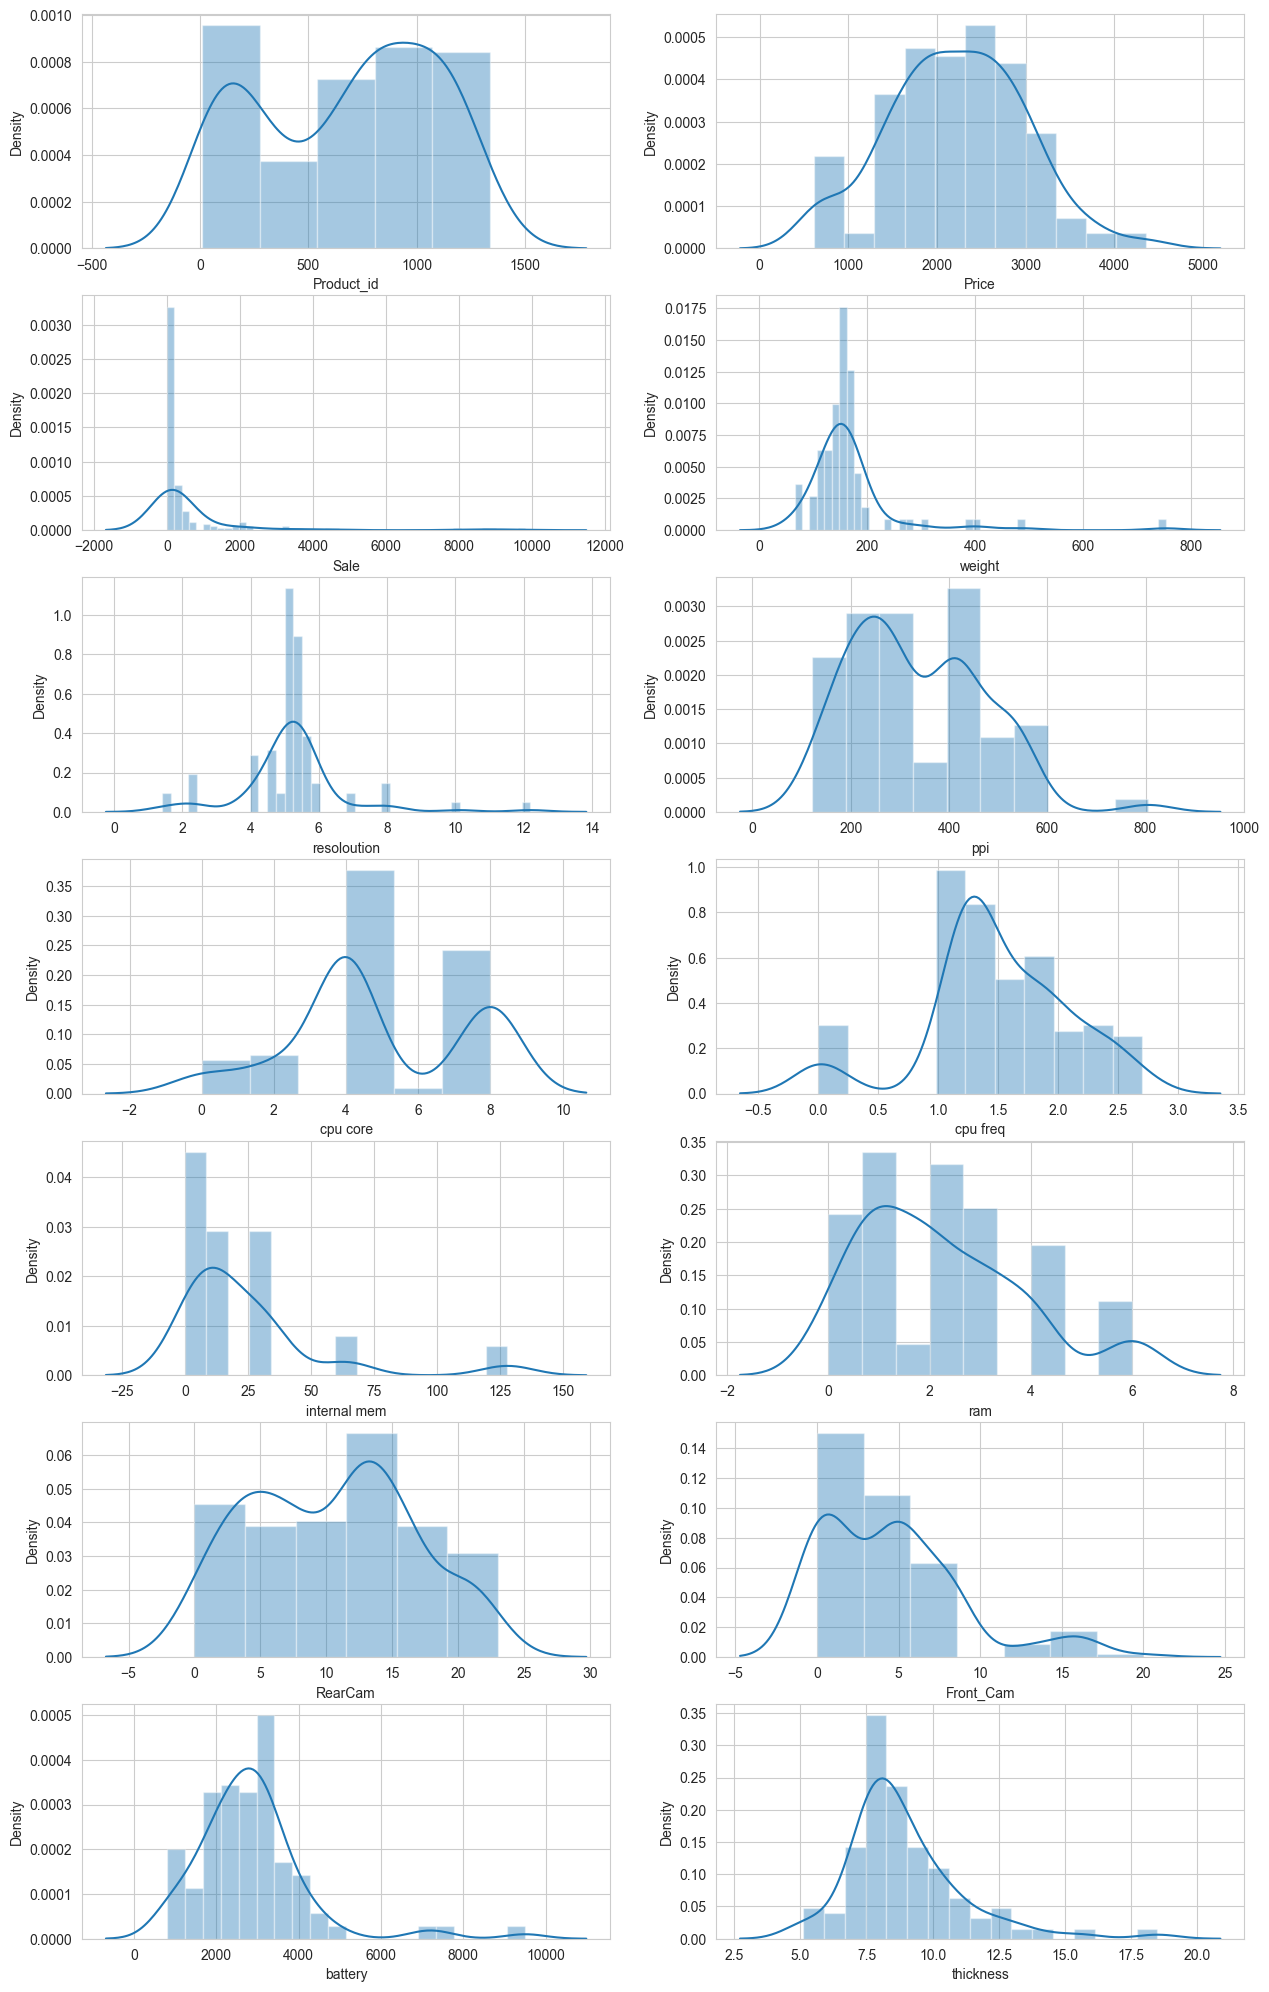

In [53]:
n_rows=7
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(15,25))
for i, column in enumerate(cell_df.columns):
      sns.distplot(cell_df[column],ax=axes[i//n_cols,i%n_cols])
plt.show()

coontain multiple axes or plots

## pairplot

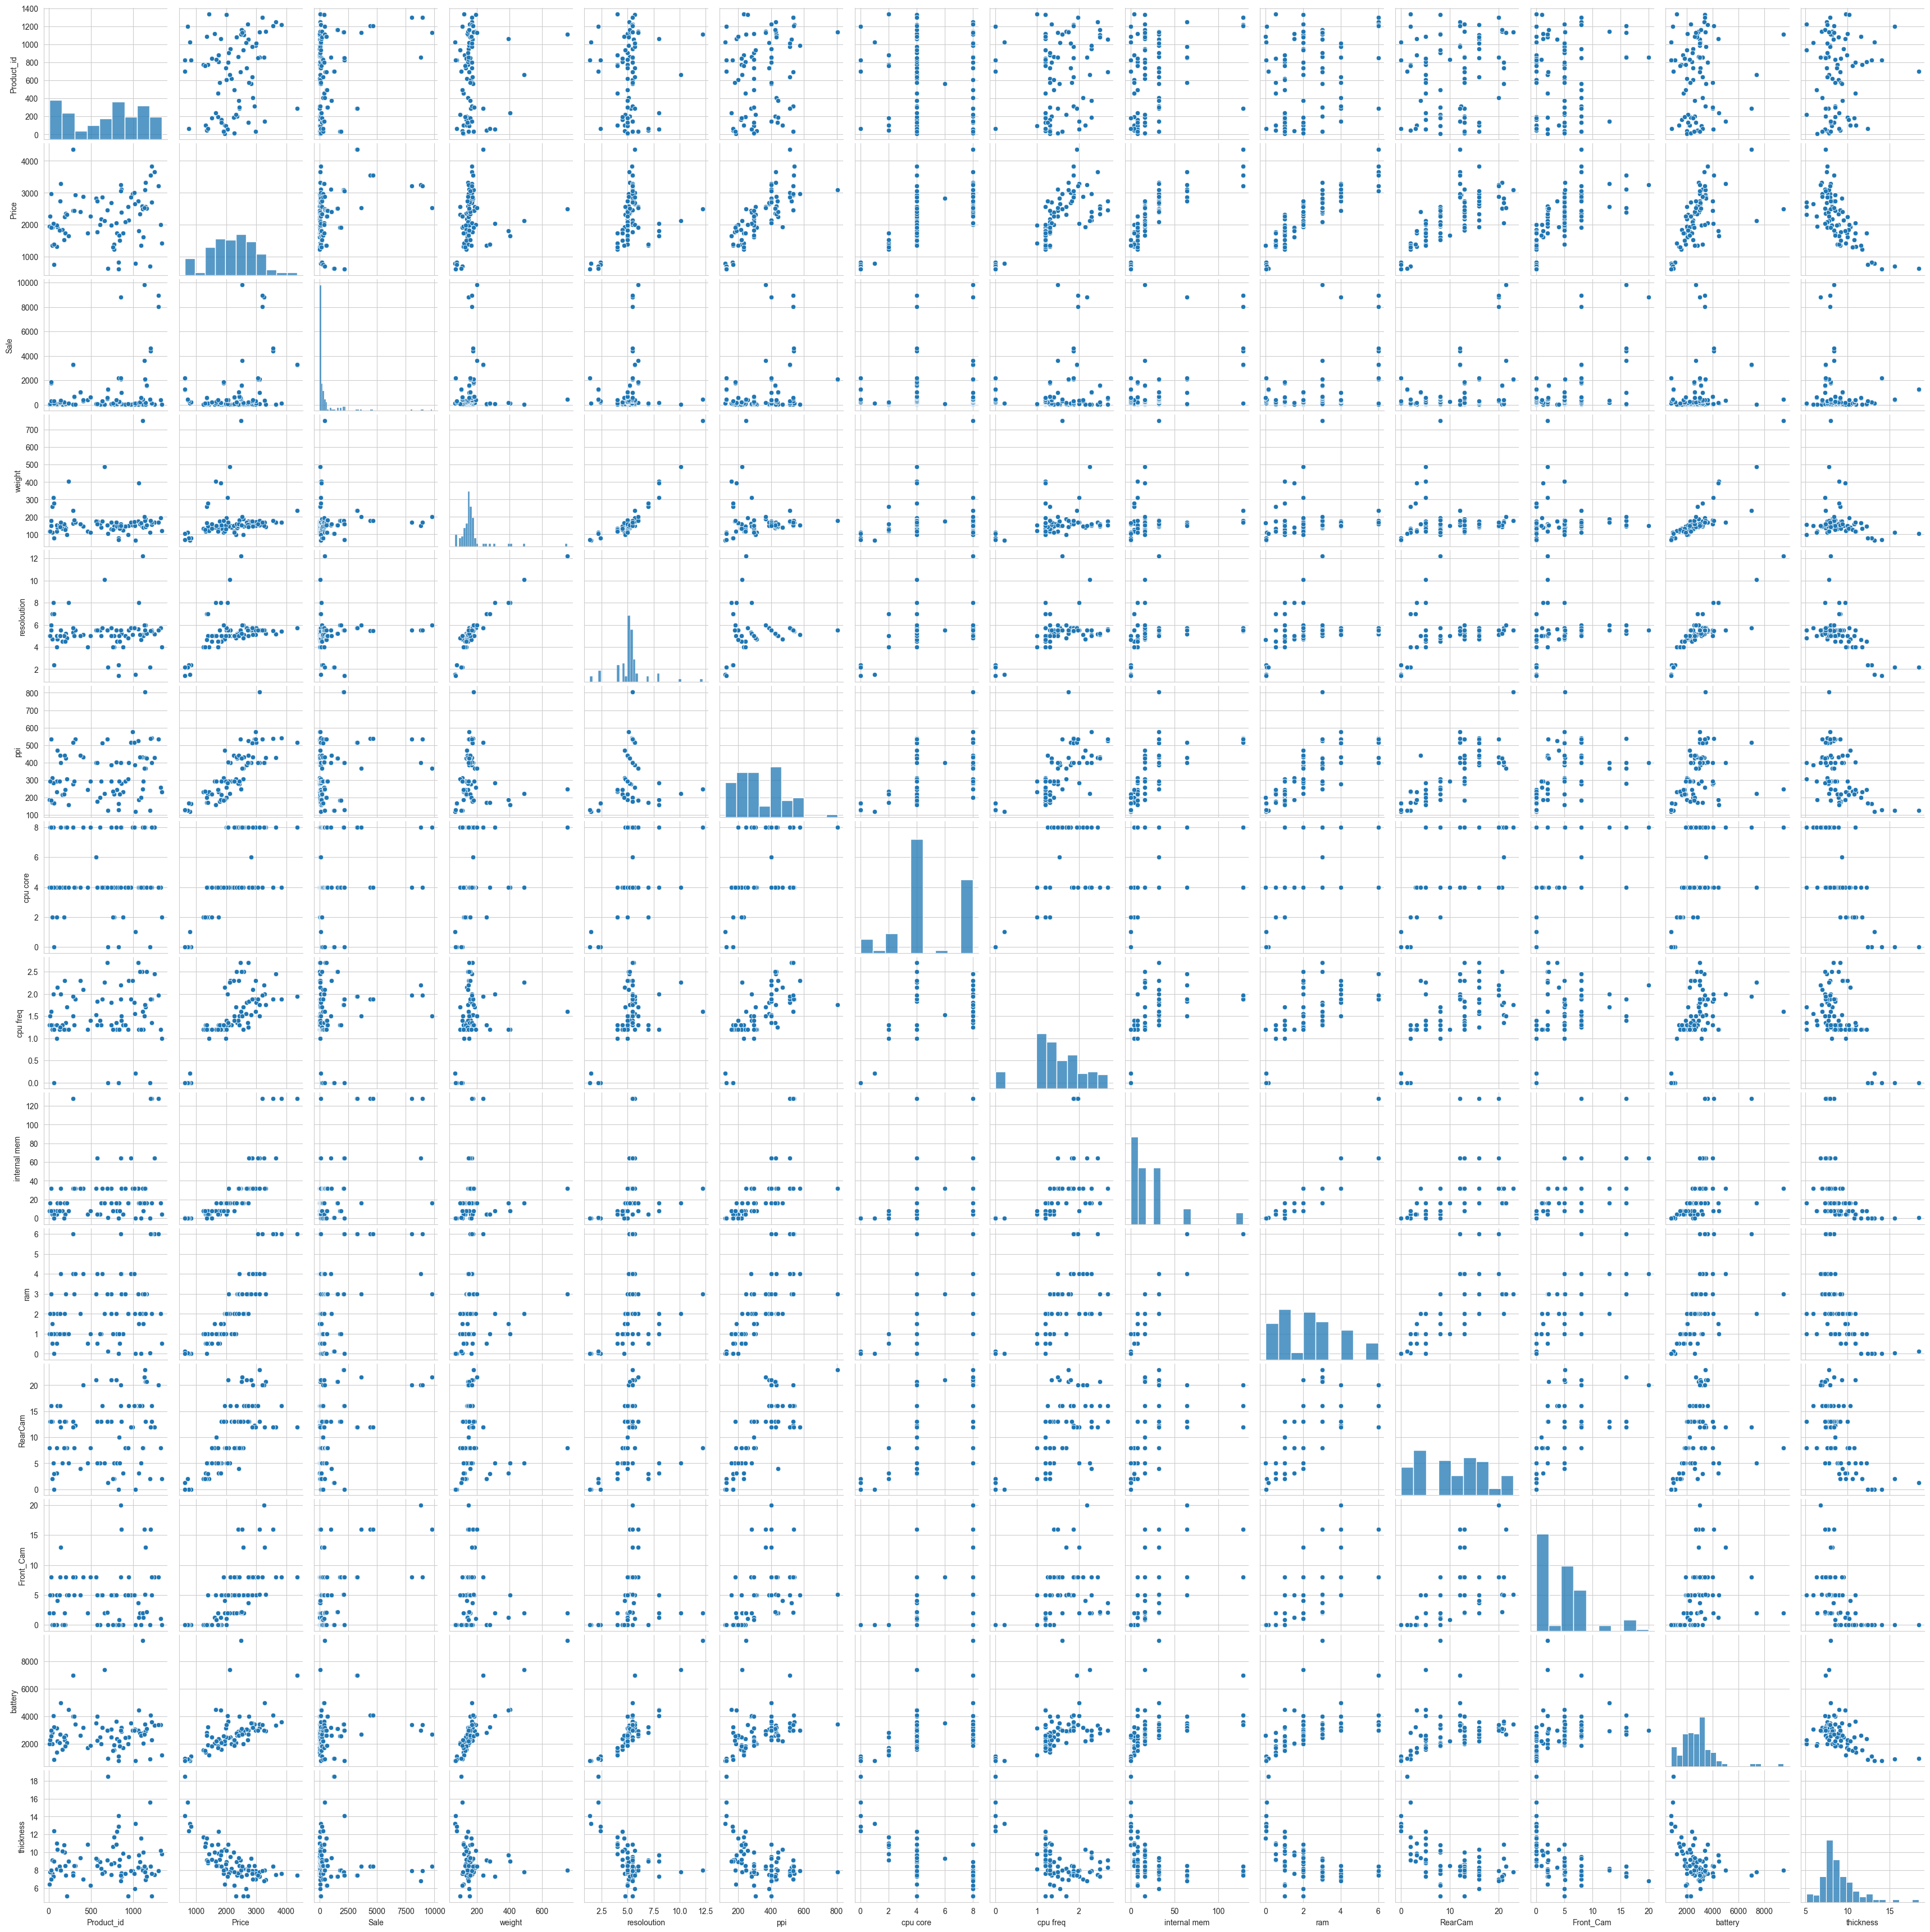

In [54]:
sns.pairplot(cell_df)
plt.show()

relationship between each pair of variables

## jointpoint

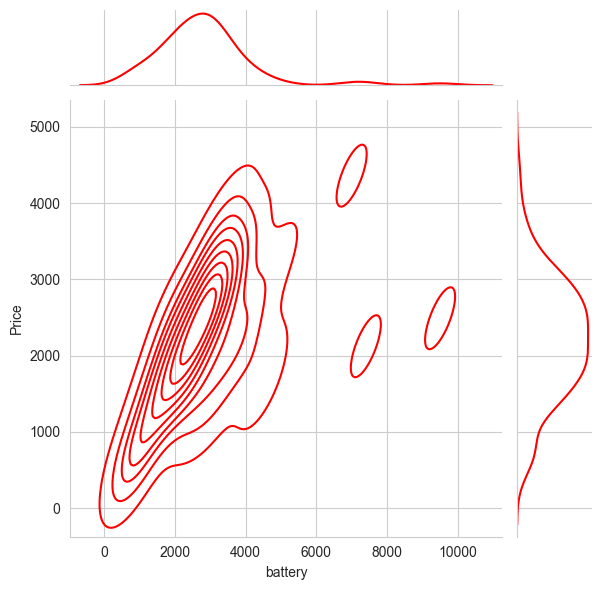

In [55]:
sns.jointplot(x='battery',y='Price',data=cell_df,color='red',kind='kde');
plt.show()

## pointplot

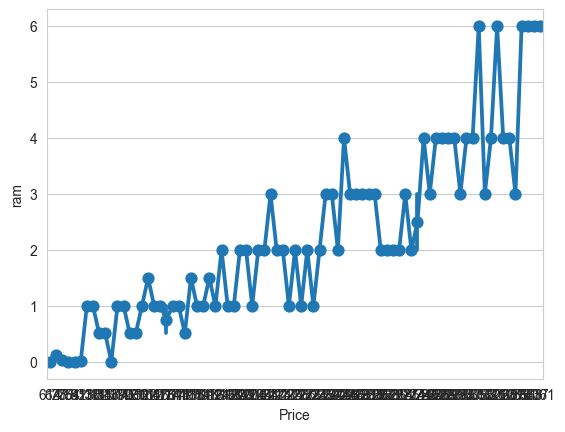

In [56]:
sns.pointplot(x='Price',y='ram',data=cell_df);
plt.show()

In [57]:
cell_df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


## Handling skewness


Product_id
0       203
1       880
2        40
3        99
4       880
       ... 
156    1206
157    1296
158     856
159    1296
160    1131
Name: Product_id, Length: 161, dtype: int64


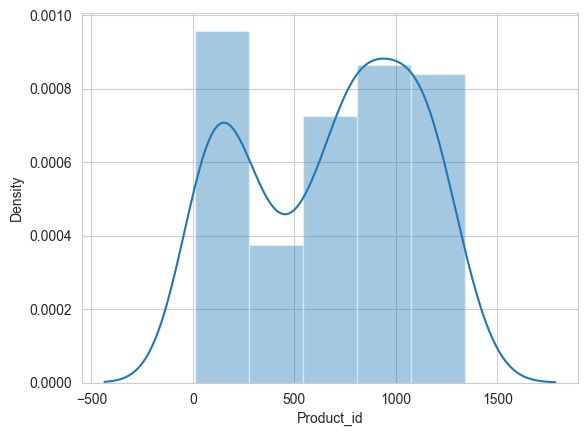


Price
0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64


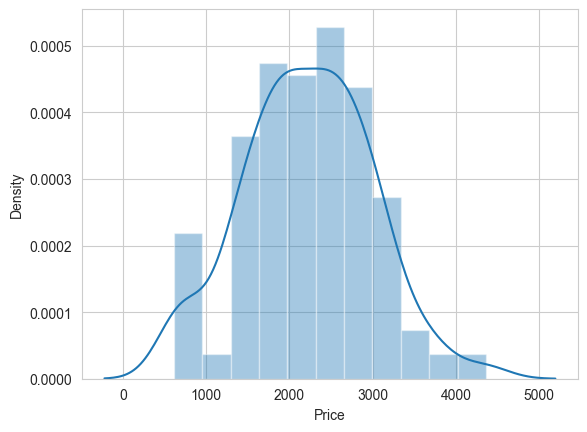


Sale
0        10
1        10
2        10
3        11
4        11
       ... 
156    4638
157    8016
158    8809
159    8946
160    9807
Name: Sale, Length: 161, dtype: int64


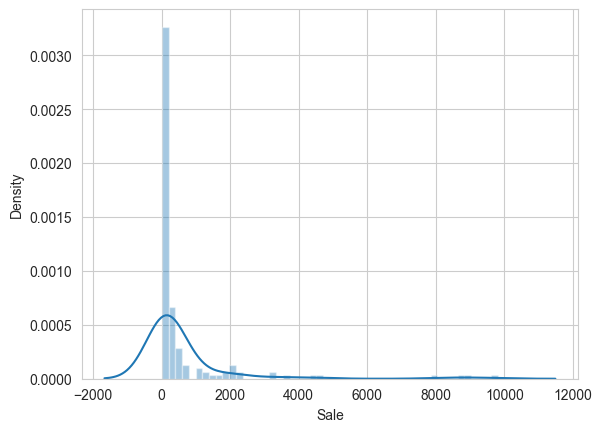


weight
0      135.0
1      125.0
2      110.0
3      118.5
4      125.0
       ...  
156    178.0
157    170.0
158    150.0
159    170.0
160    202.0
Name: weight, Length: 161, dtype: float64


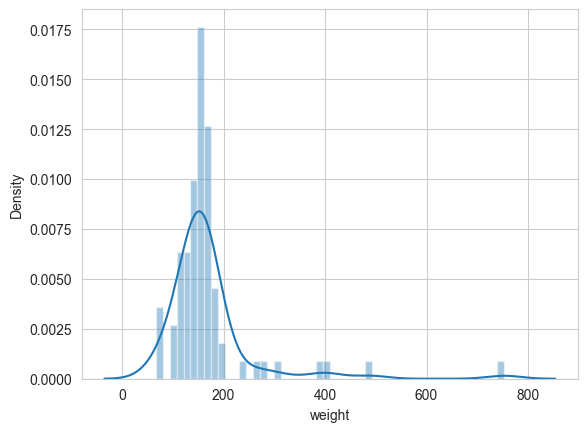


resoloution
0      5.20
1      4.00
2      4.70
3      4.00
4      4.00
       ... 
156    5.46
157    5.50
158    5.50
159    5.50
160    6.00
Name: resoloution, Length: 161, dtype: float64


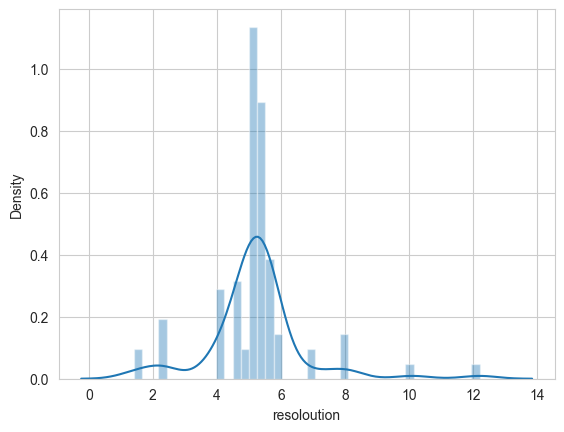


ppi
0      424
1      233
2      312
3      233
4      233
      ... 
156    538
157    534
158    401
159    534
160    367
Name: ppi, Length: 161, dtype: int64


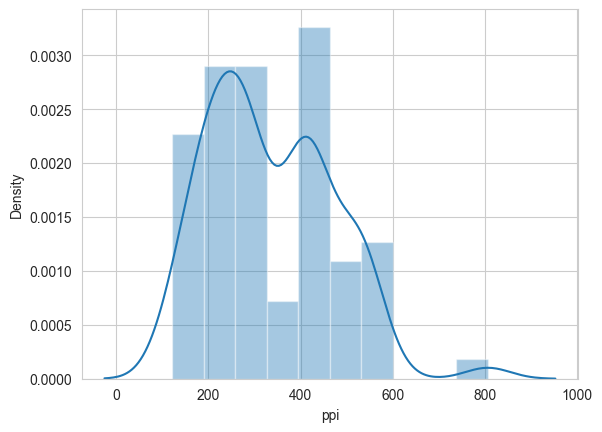


cpu core
0      8
1      2
2      4
3      2
4      2
      ..
156    4
157    4
158    8
159    4
160    8
Name: cpu core, Length: 161, dtype: int64


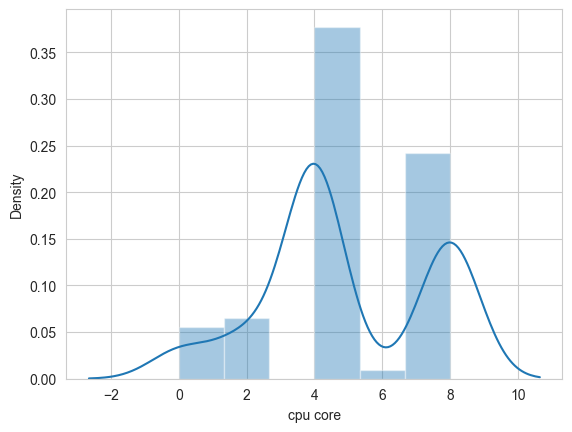


cpu freq
0      1.350
1      1.300
2      1.200
3      1.300
4      1.300
       ...  
156    1.875
157    1.975
158    2.200
159    1.975
160    1.500
Name: cpu freq, Length: 161, dtype: float64


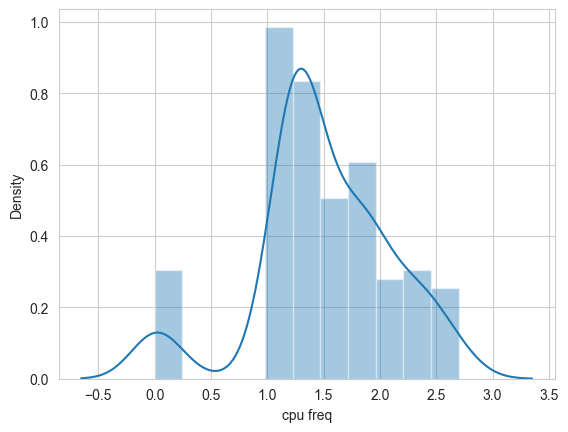


internal mem
0       16.0
1        4.0
2        8.0
3        4.0
4        4.0
       ...  
156    128.0
157    128.0
158     64.0
159    128.0
160     16.0
Name: internal mem, Length: 161, dtype: float64


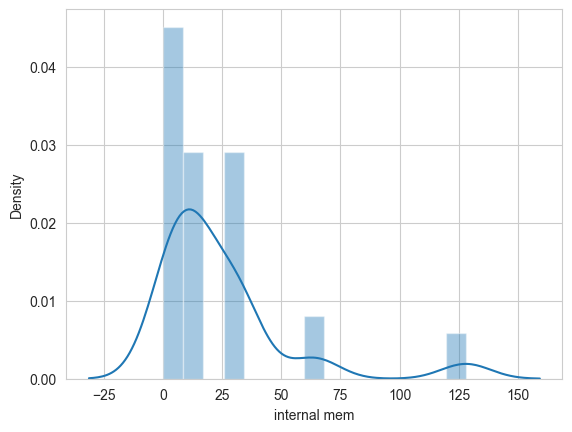


ram
0      3.000
1      1.000
2      1.500
3      0.512
4      1.000
       ...  
156    6.000
157    6.000
158    4.000
159    6.000
160    3.000
Name: ram, Length: 161, dtype: float64


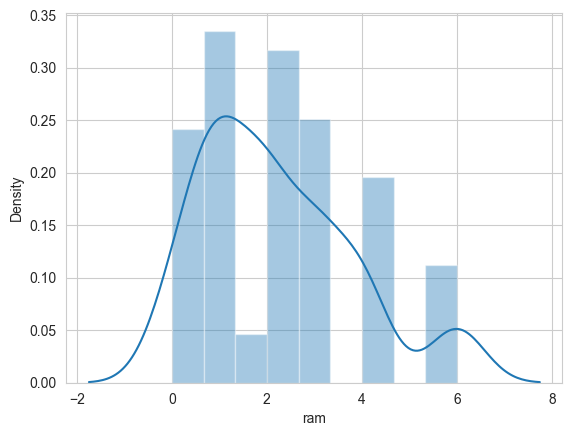


RearCam
0      13.00
1       3.15
2      13.00
3       3.15
4       3.15
       ...  
156    12.00
157    20.00
158    20.00
159    20.00
160    21.50
Name: RearCam, Length: 161, dtype: float64


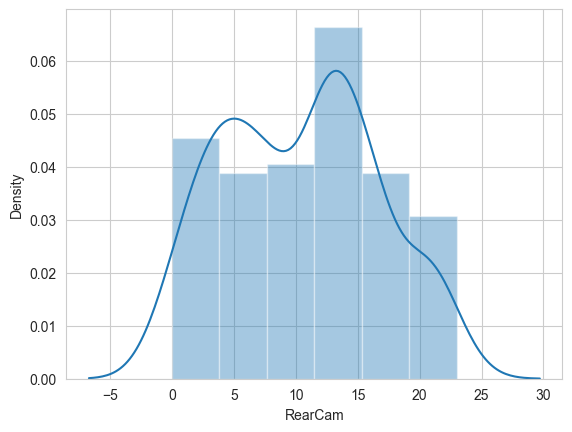


Front_Cam
0       8.0
1       0.0
2       5.0
3       0.0
4       0.0
       ... 
156    16.0
157     8.0
158    20.0
159     8.0
160    16.0
Name: Front_Cam, Length: 161, dtype: float64


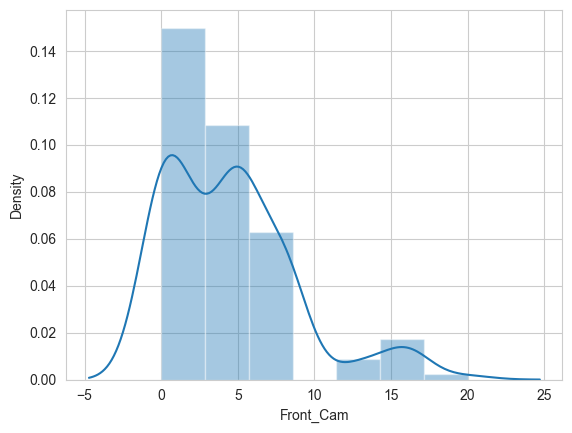


battery
0      2610
1      1700
2      2000
3      1400
4      1700
       ... 
156    4080
157    3400
158    3000
159    3400
160    2700
Name: battery, Length: 161, dtype: int64


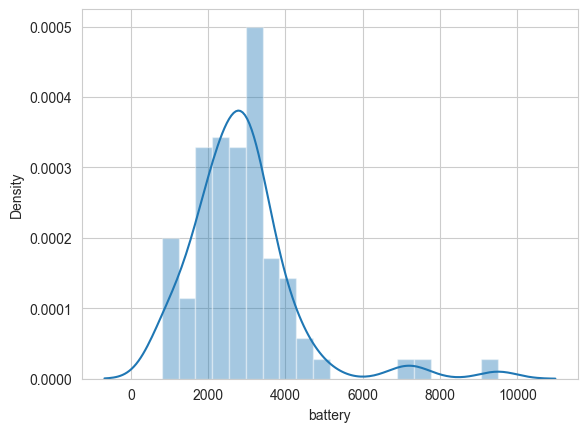


thickness
0       7.4
1       9.9
2       7.6
3      11.0
4       9.9
       ... 
156     8.4
157     7.9
158     6.8
159     7.9
160     8.4
Name: thickness, Length: 161, dtype: float64


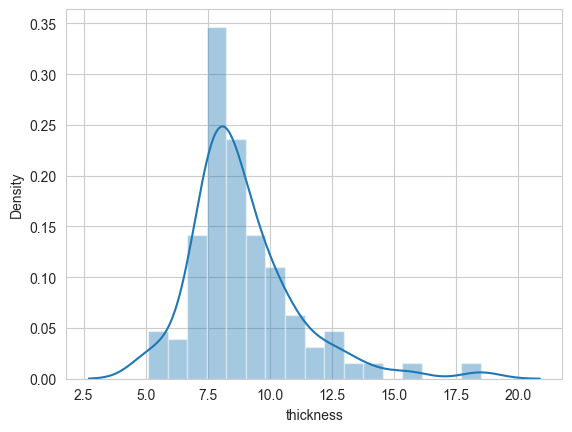

In [58]:
for col in cell_df.columns:
  print()
  print(col)
  print(cell_df[col])
  plt.figure()
  sns.distplot(cell_df[col])
  plt.show()

In [59]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [60]:
cell_df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


checking if the target(price_range) data is balanced or imbalanced data

In [149]:
cell_df['ram'].value_counts()

ram
1.000    36
2.000    34
3.000    27
4.000    21
0.512    12
6.000    12
0.004     6
1.500     5
0.008     2
0.032     2
0.000     2
0.128     2
Name: count, dtype: int64

In [150]:
corr = cell_df.corr()
corr.sort_values(['ram'], ascending=False, inplace=True)
corr.ram.head(6)

ram             1.000000
Price           0.896915
internal mem    0.875354
ppi             0.748724
RearCam         0.648073
Front_Cam       0.647470
Name: ram, dtype: float64

# what is affection of ram in price?

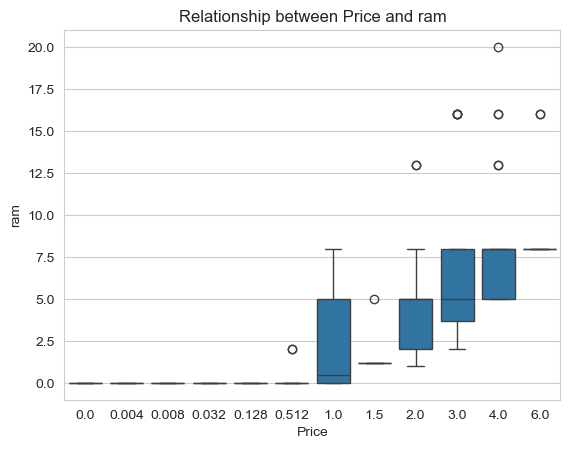

In [157]:
sns.boxplot(x='ram', y='Front_Cam', data=cell_df)  
plt.xlabel('Price')
plt.ylabel('ram')
plt.title('Relationship between Price and ram')
plt.show()

create box plots, which visually represent the distribution of data and help detect outliers.

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

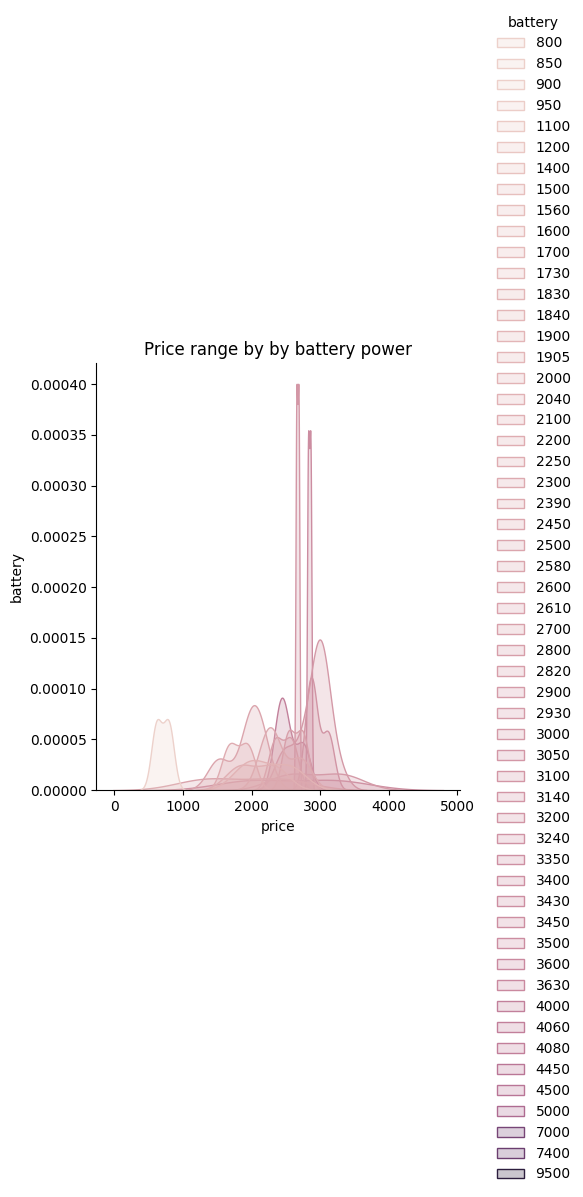

In [61]:
sns.displot(data=cell_df, x='Price', hue='battery', kind='kde', fill=True)
plt.xlabel('price')
plt.ylabel('battery')
plt.title('Price range by by battery power')
plt.show()

## PieChart

visualizing the distribution of a dataset.

In [98]:
cell_df['ram'].unique()

array([3.00e+00, 1.00e+00, 1.50e+00, 5.12e-01, 2.00e+00, 4.00e+00,
       6.00e+00, 4.00e-03, 8.00e-03, 3.20e-02, 0.00e+00, 1.28e-01])

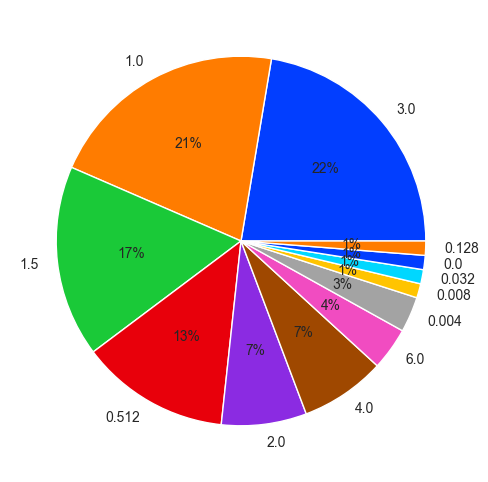

In [103]:
plt.figure(figsize=(6,6))
data=cell_df["ram"].value_counts()

keys=[3.00e+00, 1.00e+00, 1.50e+00, 5.12e-01, 2.00e+00, 4.00e+00,
       6.00e+00, 4.00e-03, 8.00e-03, 3.20e-02, 0.00e+00, 1.28e-01]

palette_color=sns.color_palette('bright')
plt.pie(data,labels=keys,colors=palette_color,autopct='%.0f%%')
plt.show()

ram is high 3.0 

In [91]:
cell_df['Price'].unique()

array([2357, 1749, 1916, 1315, 2137, 1238, 2580, 2438, 2006, 2174, 2744,
       1612, 2258, 2938, 2392, 2977, 1942, 1390, 1950, 3316, 2654, 1421,
       2124, 1777, 2087, 1843, 2859, 1989, 2685, 1741, 1347, 3658, 1984,
       2824, 2746, 2323, 2044, 1734, 2276, 3116, 2571, 1396, 2714, 3005,
        791, 3837, 1646, 1302, 1831, 1810, 1511, 2562, 1522, 2343,  833,
       1676, 2858,  754, 2975, 2880, 3287, 2054, 2001,  705, 2491, 2466,
       1357, 2266, 2445, 2409,  628, 2508, 1921, 3102, 3055,  614, 4361,
       2536, 3551, 3211, 3260])

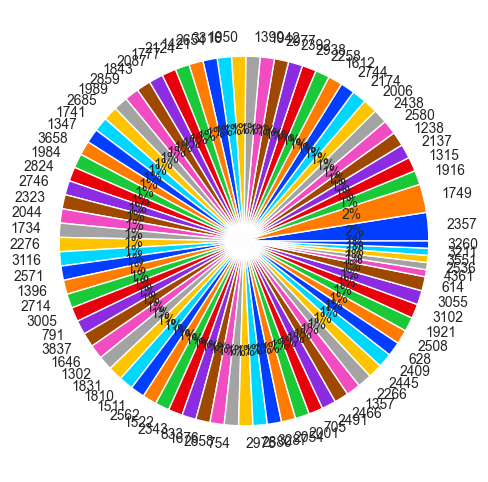

In [97]:
plt.figure(figsize=(6,6))
data=cell_df["Price"].value_counts()

keys=[2357, 1749, 1916, 1315, 2137, 1238, 2580, 2438, 2006, 2174, 2744,
       1612, 2258, 2938, 2392, 2977, 1942, 1390, 1950, 3316, 2654, 1421,
       2124, 1777, 2087, 1843, 2859, 1989, 2685, 1741, 1347, 3658, 1984,
       2824, 2746, 2323, 2044, 1734, 2276, 3116, 2571, 1396, 2714, 3005,
        791, 3837, 1646, 1302, 1831, 1810, 1511, 2562, 1522, 2343,  833,
       1676, 2858,  754, 2975, 2880, 3287, 2054, 2001,  705, 2491, 2466,
       1357, 2266, 2445, 2409,  628, 2508, 1921, 3102, 3055,  614, 4361,
       2536, 3551, 3211, 3260]

palette_color=sns.color_palette('bright')
plt.pie(data,labels=keys,colors=palette_color,autopct='%.0f%%')
plt.show()

## conclusion

Through data analysis in mobile price prediction, you identify key features 
influencing the price, discover patterns, and build an accurate machine learning model. 
EDA helps to uncover relationships between different features and the target variable (price)
while cleaning, transforming, and engineering features improves model performance.